### Importing of Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Data Exploration

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data = data.drop(columns="Unnamed: 0")

In [5]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
data.shape

(300153, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


### Checking if any NULL values

In [8]:
data.isnull().values.any()

False

### Checking of Categorical Data and Using One hot Encoding

In [9]:
data.select_dtypes(include="object").columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [10]:
data.select_dtypes(include=['int64','float64']).columns

Index(['duration', 'days_left', 'price'], dtype='object')

In [11]:
data = pd.get_dummies(data=data,drop_first=True)

### Countplot

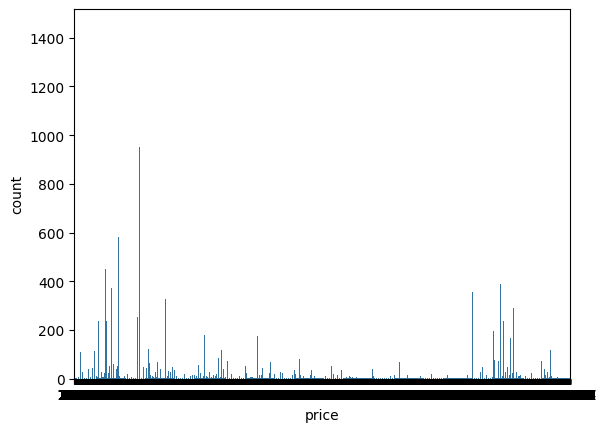

In [12]:
sns.countplot(x="price",data=data)
plt.show()

# Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
x = data.drop(columns="price")
y = data["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Model Selection

### 1. Using LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train,y_train)
y_pred = regressor_linear.predict(x_test)

In [16]:
from sklearn.metrics import r2_score
result_1 = r2_score(y_test,y_pred)

In [17]:
result_1

-6.607669556796811e+19

### 2. Using DecisionTreeRegressor

In [18]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(x_train,y_train)
y_pred = regressor_tree.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
result_2 = r2_score(y_test,y_pred)

In [20]:
result_2

0.9825811253614646

### 3. Using RandomForestRegressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor_randomForest = RandomForestRegressor()
regressor_randomForest.fit(x_train,y_train)
y_pred = regressor_randomForest.predict(x_test)

In [22]:
from sklearn.metrics import r2_score
result_3 = r2_score(y_test,y_pred)

In [23]:
result_3

0.989491696267285

### 4. Using XGBRFRegressor

In [24]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train,y_train)
y_pred = regressor_xgb.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
result_4 = r2_score(y_test,y_pred)

In [26]:
result_4

0.9481126725946248

### 5. Using SGDRegressor

In [27]:
from sklearn.linear_model import SGDRegressor
regressor_sgd = SGDRegressor()
regressor_sgd.fit(x_train,y_train)
y_pred = regressor_sgd.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [28]:
from sklearn.metrics import r2_score
result_5 = r2_score(y_test,y_pred)

In [29]:
result_5

-105346507492968.88

### 6. Using GradientBoostingRegressor

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
regressor_gradient = GradientBoostingRegressor()
regressor_gradient.fit(x_train,y_train)
y_pred = regressor_gradient.predict(x_test)

In [31]:
from sklearn.metrics import r2_score
result_6 = r2_score(y_test,y_pred)

In [32]:
result_6

0.9548881660409726

In [55]:
final_result = pd.DataFrame([["LinearRegression",result_1],["DecisionTreeRegressor",result_2],["RandomForestRegressor",result_3],["XGBRFRegressor",result_4],["SGDRegressor",result_5],["GradientBoostingRegressor",result_6]],columns=["Model","R2 Score"])

In [57]:
final_result

,Model,R2 Score
0,LinearRegression,-6.607670e+19
1,DecisionTreeRegressor,9.825811e-01
2,RandomForestRegressor,9.894917e-01
3,XGBRFRegressor,9.481127e-01
4,SGDRegressor,-1.053465e+14
5,GradientBoostingRegressor,9.548882e-01


# Final Model : RandomForestRegressor